<a href="https://colab.research.google.com/github/jerinSabrina/PCA_imageCompression/blob/main/PCA_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the necessary libraries in Python

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA


#**Reading the Original Image**


In [4]:
# Load the image and convert to grayscale
def load_and_preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img_data = np.array(img)
    return img_data, img


Original Image Data


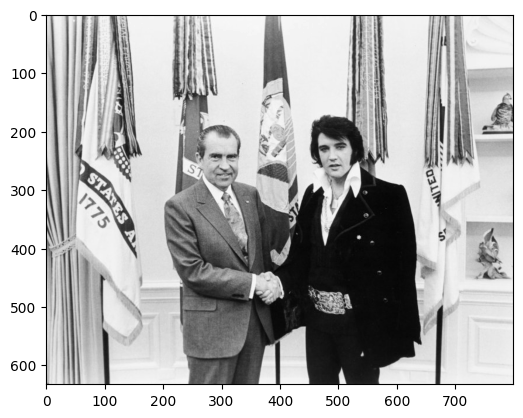

In [5]:
image_path = '/content/elvis-nixon.jpeg'
img_data, original_img = load_and_preprocess_image(image_path)
print('Original Image Data')
plt.imshow(original_img, cmap='gray')
plt.show()

# **Computing PCA for Input**

In [6]:
# Function to perform PCA on the image data

def apply_pca(img_data, n_components):
    # Flatten the 2D image data into a 1D array to apply PCA
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(img_data)
    explained_variance = pca.explained_variance_ratio_
    return transformed_data, pca, explained_variance


# **Reconstruction of the Image as reduced number of compomnents**


In [7]:
# Reconstruct the image using inverse PCA
def reconstruct_image(pca, transformed_data):
    reconstructed_data = pca.inverse_transform(transformed_data)
    return np.uint8(reconstructed_data)


# **Display Original and Reconstructed Images**

In [8]:

# Display original and reconstructed images
def display_images(original_img, reconstructed_img, explained_variance):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Original Image
    ax[0].imshow(original_img, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # Reconstructed Image
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title(f"Reconstructed Image\nVariance: {sum(explained_variance):.2f}")
    ax[1].axis('off')

    plt.show()


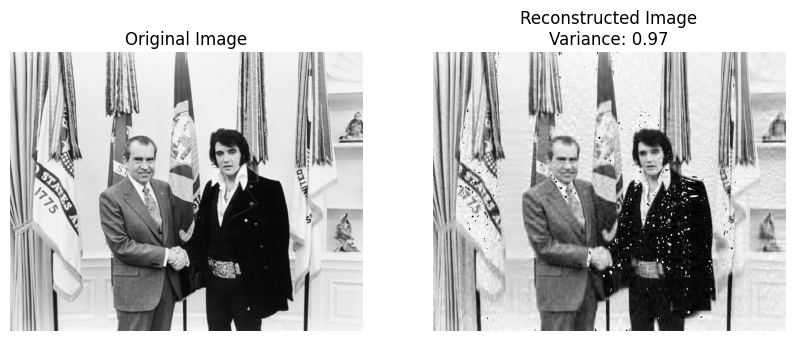

Original image size: (633, 800)
Reconstructed image size: (633, 800)


In [9]:

# Main execution
image_path = '/content/elvis-nixon.jpeg'  # Provide path to the image file
n_components = 50  # Define the number of PCA components

# Load and preprocess the image
img_data, original_img = load_and_preprocess_image(image_path)

# Apply PCA for image compression
transformed_data, pca, explained_variance = apply_pca(img_data, n_components)

# Reconstruct the image using PCA components
reconstructed_img = reconstruct_image(pca, transformed_data)

# Display the original and the reconstructed image
display_images(original_img, reconstructed_img, explained_variance)
# Check sizes
print("Original image size:", img_data.shape)
print("Reconstructed image size:", reconstructed_img.shape)


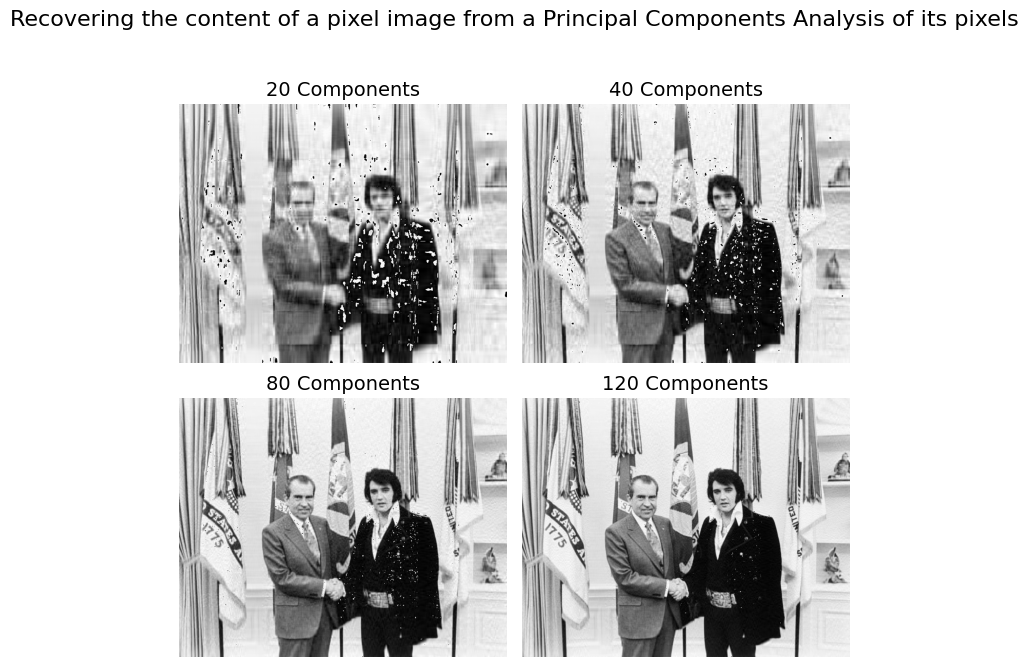

In [10]:
# Modified function to display the grid of images similar to the uploaded example
def display_pca_grid(original_img, img_data, component_values):
    fig, ax = plt.subplots(2, 2, figsize=(7, 7))
    fig.suptitle("Recovering the content of a pixel image from a Principal Components Analysis of its pixels", fontsize=16)

    # Apply PCA for each component value and display the reconstructed images in a grid
    for i, n_components in enumerate(component_values):
        transformed_data, pca, explained_variance = apply_pca(img_data, n_components)
        reconstructed_img = reconstruct_image(pca, transformed_data)

        row, col = divmod(i, 2)
        ax[row, col].imshow(reconstructed_img, cmap='gray')
        ax[row, col].set_title(f"{n_components} Components", fontsize=14)
        ax[row, col].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the title
    plt.show()
image_path = '/content/elvis-nixon.jpeg'
img_data, original_img = load_and_preprocess_image(image_path)
# Component values to match the example
component_values = [20, 40, 80, 120]
save_path = "/content/pca_image_compression_grid.png"  # You can change this to your preferred location and format

# Display the grid of reconstructed images
display_pca_grid(original_img, img_data, component_values)


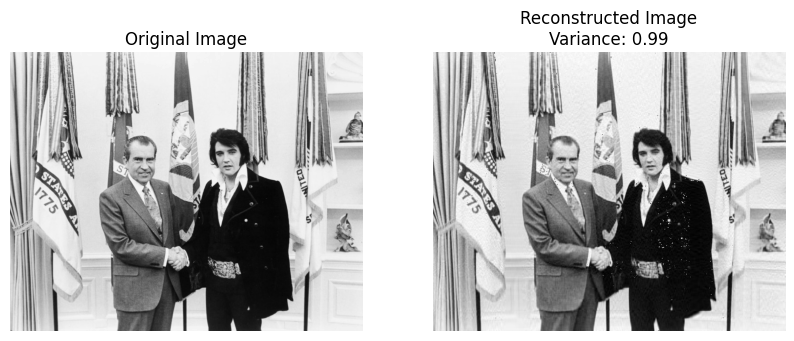

In [11]:
# Main execution
image_path = '/content/elvis-nixon.jpeg'  # Provide path to the image file
n_components = 100  # Define the number of PCA components

# Load and preprocess the image
img_data, original_img = load_and_preprocess_image(image_path)

# Apply PCA for image compression
transformed_data, pca, explained_variance = apply_pca(img_data, n_components)

# Reconstruct the image using PCA components
reconstructed_img = reconstruct_image(pca, transformed_data)

# Display the original and the reconstructed image
display_images(original_img, reconstructed_img, explained_variance)

In [12]:
def plot_scree(pca):
    explained_variance = pca.explained_variance_ratio_
    components = np.arange(1, len(explained_variance) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(components, explained_variance, marker='o', linestyle='--', color='b')
    plt.title('Scree Plot: Variance Explained by Each Principal Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio (Eigenvalue)')
    plt.grid(True)
    plt.axvline(x=components[np.argmax(np.diff(explained_variance))], linestyle='--', color='r', label='Elbow')
    plt.legend()
    plt.show()

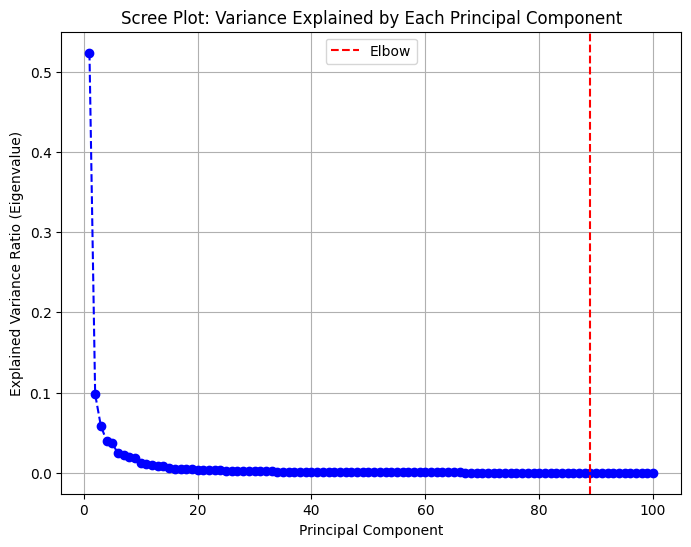

In [13]:
# Plot the scree plot
plot_scree(pca)

In [18]:
def plot_individual_variance(explained_variance, num_components_to_plot=20, title="Individual Variance for each Principal Component"):
    """
    Plots the individual variance explained by each principal component.

    Args:
        explained_variance (array-like): The explained variance of each principal component.
        num_components_to_plot (int, optional): The number of components to plot. Defaults to 20.
        title (str, optional): The title of the plot. Defaults to "Individual Variance for each Principal Component".
    """
    components = np.arange(1, num_components_to_plot + 1)  # Create component indices

    # Selecting the explained variance for the components to be plotted
    explained_variance_to_plot = explained_variance[:num_components_to_plot]

    plt.figure(figsize=(8, 6))
    plt.bar(components, explained_variance_to_plot, color='black')  # Bar plot for explained variance
    plt.title(title)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance')
    plt.show()

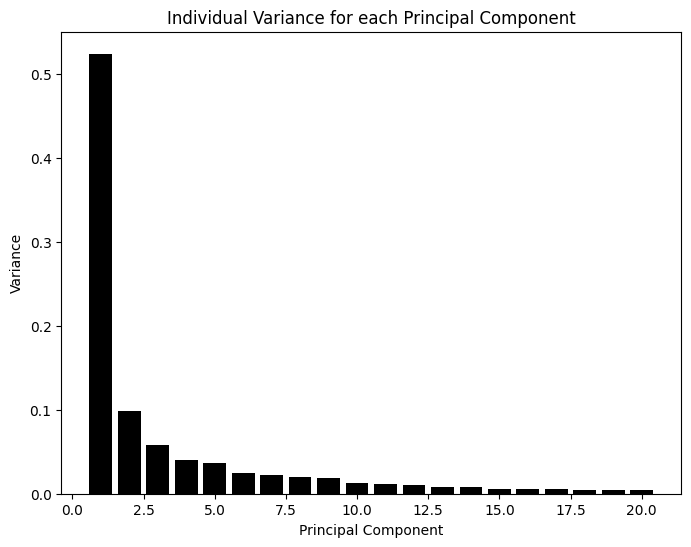

In [19]:
plot_individual_variance(explained_variance)